In [1]:
import pandas as pd
df = pd.read_excel('AI_Agent_Records_Final_10327.xlsx')
# 📌 欲刪除欄位
cols_to_drop = [
    'AI Agent',
    'wallet_access_actions',
    'pii_handling_actions',
    'spending_limits_status',
    'transaction_status',
    'network_activity_status',
    'number_of_network_activity',
    'financial_advice'
]

# 🧼 建立新的 DataFrame
df_reduced = df.drop(columns=cols_to_drop)

# 🔍 檢查欄位型態
df_reduced.dtypes


,0
wallet_access_status,object
pii_handling_status,object
spending_limits,float64
SLOC,int64
LLOC,int64
CLOC,int64
NF,int64
WMC,int64
NL,int64
NLE,int64


# Random Forest

📊 Random Forest Performance:
RMSE: 7.6806
R²  : 0.9003


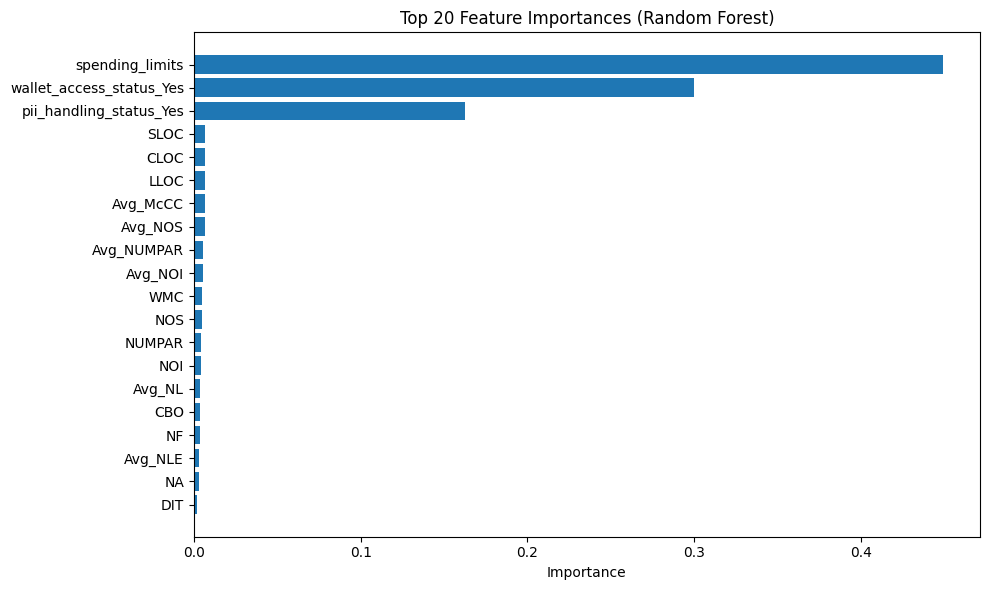

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🎯 特徵與目標
X_rf = df[[  # 👈 明確命名
    'wallet_access_status',
    'pii_handling_status',
    'spending_limits',
    'SLOC', 'LLOC', 'CLOC', 'NF', 'WMC', 'NL', 'NLE', 'NUMPAR', 'NOS',
    'DIT', 'NOA', 'NOD', 'CBO', 'NA', 'NOI',
    'Avg_McCC', 'Avg_NL', 'Avg_NLE', 'Avg_NUMPAR', 'Avg_NOS', 'Avg_NOI'
]]
y_rf = df['risk_score']

# 🔧 分類與數值欄位
cat_cols_rf = ['wallet_access_status', 'pii_handling_status']
num_cols_rf = [col for col in X_rf.columns if col not in cat_cols_rf]

# 🔧 ColumnTransformer：OneHot for cat, passthrough for num
preprocessor_rf = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_rf)
], remainder='passthrough')

# 📦 RF Pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 📊 Split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

# 🚀 Train RF
rf_model.fit(X_rf_train, y_rf_train)

# 📈 評估
y_rf_pred = rf_model.predict(X_rf_test)
rmse_rf = np.sqrt(mean_squared_error(y_rf_test, y_rf_pred))
r2_rf = r2_score(y_rf_test, y_rf_pred)
print("📊 Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²  : {r2_rf:.4f}")

# 🔍 特徵名稱整理（OneHot + 數值）
ohe_rf = rf_model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_cols_rf = ohe_rf.get_feature_names_out(cat_cols_rf)
all_feature_names_rf = np.concatenate([encoded_cat_cols_rf, num_cols_rf])

# 📌 特徵重要性
rf = rf_model.named_steps["regressor"]
importances_rf = rf.feature_importances_
feature_df_rf = pd.DataFrame({
    "Feature": all_feature_names_rf,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

# 📊 繪圖
plt.figure(figsize=(10, 6))
plt.barh(feature_df_rf["Feature"][:20][::-1], feature_df_rf["Importance"][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()




# XGBoost

📊 XGBoost Performance:
RMSE: 8.2277
R²  : 0.8856


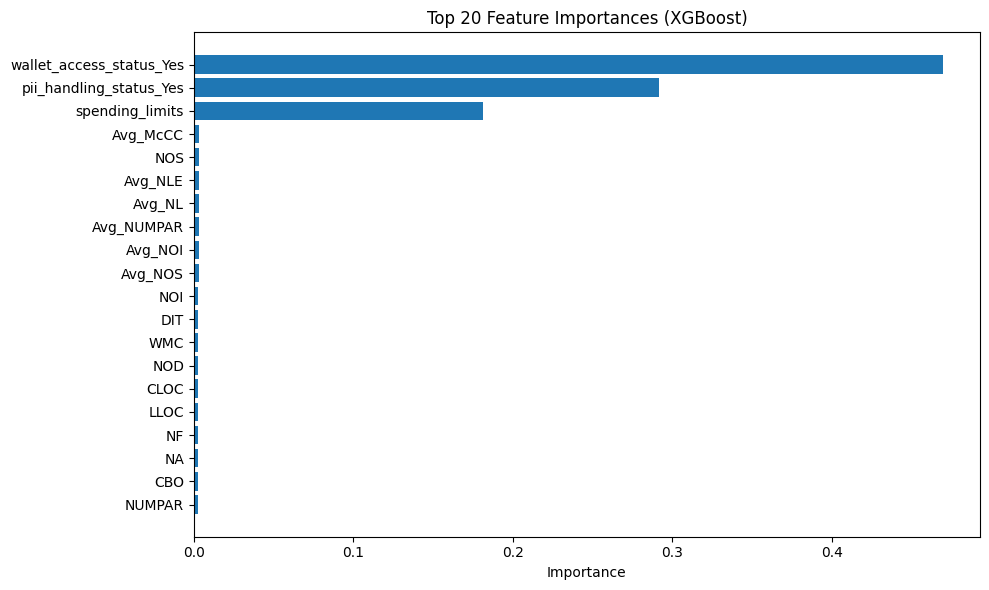

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🎯 特徵與目標（與 RF 相同欄位）
X_xgb = df[[  # 👈 差異化命名
    'wallet_access_status',
    'pii_handling_status',
    'spending_limits',
    'SLOC', 'LLOC', 'CLOC', 'NF', 'WMC', 'NL', 'NLE', 'NUMPAR', 'NOS',
    'DIT', 'NOA', 'NOD', 'CBO', 'NA', 'NOI',
    'Avg_McCC', 'Avg_NL', 'Avg_NLE', 'Avg_NUMPAR', 'Avg_NOS', 'Avg_NOI'
]]
y_xgb = df['risk_score']

# 🔧 分類與數值欄位
cat_cols_xgb = ['wallet_access_status', 'pii_handling_status']
num_cols_xgb = [col for col in X_xgb.columns if col not in cat_cols_xgb]

# 🔧 ColumnTransformer 做 OneHot
preprocessor_xgb = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_xgb)
], remainder='passthrough')

# 📦 建立 XGBoost Pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

# 📊 Split
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(
    X_xgb, y_xgb, test_size=0.2, random_state=42
)

# 🚀 訓練
xgb_model.fit(X_xgb_train, y_xgb_train)

# 📈 評估
y_xgb_pred = xgb_model.predict(X_xgb_test)
rmse_xgb = np.sqrt(mean_squared_error(y_xgb_test, y_xgb_pred))
r2_xgb = r2_score(y_xgb_test, y_xgb_pred)
print("📊 XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R²  : {r2_xgb:.4f}")

# 🔍 特徵名稱整理
ohe_xgb = xgb_model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_cols_xgb = ohe_xgb.get_feature_names_out(cat_cols_xgb)
all_feature_names_xgb = np.concatenate([encoded_cat_cols_xgb, num_cols_xgb])

# 📌 特徵重要性（XGBoost）
xgb = xgb_model.named_steps["regressor"]
importances_xgb = xgb.feature_importances_

feature_df_xgb = pd.DataFrame({
    "Feature": all_feature_names_xgb,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

# 📊 繪圖
plt.figure(figsize=(10, 6))
plt.barh(feature_df_xgb["Feature"][:20][::-1], feature_df_xgb["Importance"][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


# Feature Importance (Model Based)

In [4]:
# 特徵名稱（分別從各自 pipeline 中取得）
encoded_cat_cols_rf = ohe_rf.get_feature_names_out(cat_cols_rf)
all_feature_names_rf = np.concatenate([encoded_cat_cols_rf, num_cols_rf])

encoded_cat_cols_xgb = ohe_xgb.get_feature_names_out(cat_cols_xgb)
all_feature_names_xgb = np.concatenate([encoded_cat_cols_xgb, num_cols_xgb])

# RF importance
rf_importances = rf_model.named_steps["regressor"].feature_importances_
rf_feature_df = pd.DataFrame({
    "Feature": all_feature_names_rf,
    "RF_Importance": rf_importances
})

# XGB importance
xgb_importances = xgb_model.named_steps["regressor"].feature_importances_
xgb_feature_df = pd.DataFrame({
    "Feature": all_feature_names_xgb,
    "XGB_Importance": xgb_importances
})

# 合併成比較表格（依 RF 排序）
importance_comparison = pd.merge(
    rf_feature_df, xgb_feature_df,
    on="Feature", how="outer"
).fillna(0)

# 排序與顯示
importance_comparison = importance_comparison.sort_values(
    by="RF_Importance", ascending=False
).reset_index(drop=True)

# 前 20 特徵
importance_comparison.head(20)



,Feature,RF_Importance,XGB_Importance
0,spending_limits,0.448848,0.181580
1,wallet_access_status_Yes,0.300124,0.469417
2,pii_handling_status_Yes,0.162629,0.291665
3,SLOC,0.006642,0.002285
4,CLOC,0.006563,0.002674
5,LLOC,0.006556,0.002638
6,Avg_McCC,0.006538,0.003093
7,Avg_NOS,0.006497,0.002948
8,Avg_NUMPAR,0.005720,0.002974
9,Avg_NOI,0.005189,0.002952


In [5]:
importance_comparison.to_csv("rf_xgb_feature_importance_comparison.csv", index=False)

# SHAP

In [6]:
pip install shap

In [7]:
import shap

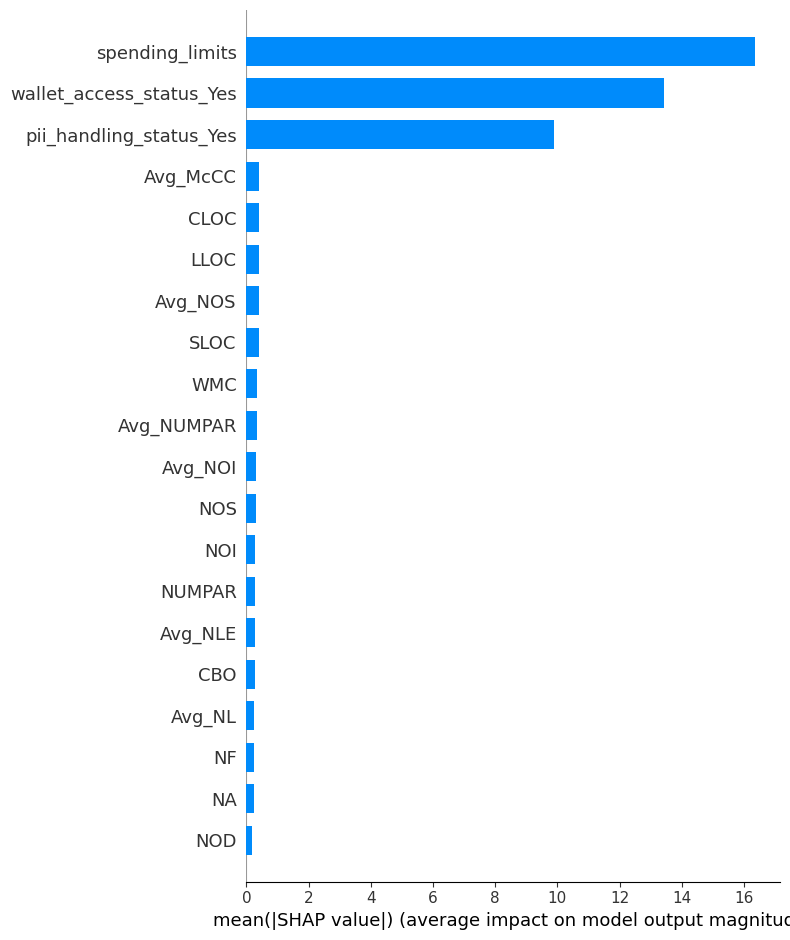

In [8]:
import shap

# ✅ 轉換訓練資料（只需 transform，不要 fit_transform）
X_train_transformed = rf_model.named_steps["preprocessor"].transform(X_rf_train)

# ✅ 抓出經 OneHot 後的所有欄位名稱
ohe = rf_model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_cols = ohe.get_feature_names_out(cat_cols_rf)
all_feature_names = np.concatenate([encoded_cat_cols, num_cols_rf])

# ⚡ 建立 explainer 並啟用 approximate 模式（速度快、精度幾乎無損）
explainer = shap.TreeExplainer(rf_model.named_steps["regressor"], feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_train_transformed, approximate=True)

# 📊 Summary Bar Plot（Top 20 features）
shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names, plot_type="bar", max_display=20)



 99%|===================| 8162/8260 [00:41<00:00]       

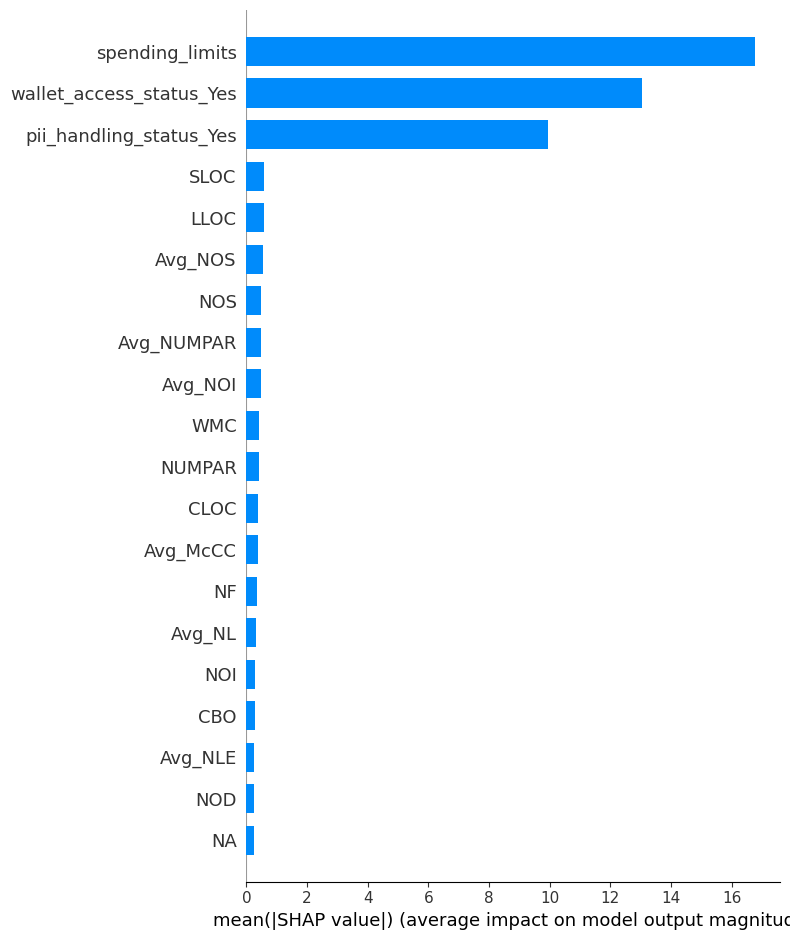

In [13]:
import shap

# ✅ Step 1: 抓出 XGBoost 模型
xgb_reg = xgb_model.named_steps["regressor"]

# ✅ Step 2: 抓出預處理後的欄位（已轉換過的訓練資料）
X_xgb_train_transformed = xgb_model.named_steps["preprocessor"].transform(X_xgb_train)

# ✅ Step 3: 使用 shap.Explainer (正式、完整的方式)
explainer_xgb = shap.Explainer(xgb_reg, X_xgb_train_transformed)

# ✅ Step 4: 計算 SHAP 值
shap_values_xgb = explainer_xgb(X_xgb_train_transformed)

# ✅ Step 5: 特徵名稱對應
ohe_xgb = xgb_model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_cols_xgb = ohe_xgb.get_feature_names_out(cat_cols_xgb)
all_feature_names_xgb = np.concatenate([encoded_cat_cols_xgb, num_cols_xgb])

# ✅ Step 6: summary_plot（正常彩色點圖）
shap.summary_plot(
    shap_values_xgb.values,
    X_xgb_train_transformed,
    feature_names=all_feature_names_xgb,
    plot_type="bar",   # 👉 改成柱狀圖
    max_display=20
)


In [15]:
# ✅ 每筆資料的 SHAP 值（行：樣本，列：特徵）
shap_df_full = pd.DataFrame(shap_values, columns=all_feature_names)

# 👀 預覽前幾筆
shap_df_full

,wallet_access_status_Yes,pii_handling_status_Yes,spending_limits,SLOC,LLOC,CLOC,NF,WMC,NL,NLE,...,NOD,CBO,NA,NOI,Avg_McCC,Avg_NL,Avg_NLE,Avg_NUMPAR,Avg_NOS,Avg_NOI
0,13.294931,9.723694,-16.498793,0.396800,-0.330474,-0.182767,0.194850,-0.455703,-0.225052,-0.093558,...,-0.055079,-0.368503,-0.530320,0.114517,-0.240844,-0.312424,0.071404,0.265676,-0.103339,-0.177806
1,-13.232329,-10.092363,-17.686812,-0.408012,0.015922,-0.570967,0.020807,-0.174803,0.081793,-0.119810,...,0.029761,0.141202,0.144409,0.569884,-0.457913,-0.113015,-0.271873,-0.223639,-0.225447,0.257385
2,14.018510,9.783629,15.895940,-0.111743,0.390660,-0.674267,-0.504321,-0.276918,0.169687,0.268058,...,0.029890,0.240674,-0.056118,0.018404,1.156681,0.072629,0.056165,0.672276,-0.612196,0.181776
3,13.294931,-10.145855,-17.141267,0.155865,0.019969,-0.031174,0.074888,0.142063,0.112828,0.156824,...,-0.420985,-0.146550,-0.150882,-0.051994,-0.279991,-0.136906,0.183881,-0.629116,-0.744986,-0.164247
4,-13.189062,-9.068896,15.869838,-0.204724,-0.542221,-0.131696,-0.407473,-0.621060,-0.018379,0.146001,...,-0.048207,-0.284737,-0.115070,-0.324994,-0.102365,-0.306335,0.038322,-0.991285,-0.191273,-0.396304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,14.018510,-9.963663,15.872729,-0.620086,-0.390161,-0.222636,0.060780,0.101720,-0.032138,-0.449305,...,0.063137,-0.254462,0.098291,-0.085270,-0.211344,-0.114502,0.242197,-0.041130,-0.541449,0.191578
8256,-13.189062,-9.068896,15.869838,-0.145004,-0.061642,-0.125311,-0.052452,0.032743,-0.102886,-0.171732,...,0.113321,0.065787,0.129843,0.186374,-0.223946,-0.651352,0.014909,-0.513039,-0.004949,0.177579
8257,-13.189062,10.373257,15.873172,-0.445920,-0.603569,-0.150655,-0.717295,-0.022533,-0.040027,0.352530,...,-0.251572,-1.033711,-0.470927,-0.347036,-0.001871,-0.462620,-0.434671,-0.437081,-0.172984,-0.401442
8258,13.294931,9.723694,-16.172006,-0.420493,0.024239,0.332892,0.288768,-0.287826,-0.097456,0.050836,...,-0.047979,-0.319986,0.239460,0.621029,0.045381,0.204487,-0.176408,0.462224,-0.106796,0.214132


In [17]:
# 每筆樣本的 SHAP 值（行 = 樣本，列 = 特徵）
shap_df_xgb = pd.DataFrame(
    shap_values_xgb.values,
    columns=all_feature_names_xgb
)

# 👀 預覽前 5 筆
shap_df_xgb

,wallet_access_status_Yes,pii_handling_status_Yes,spending_limits,SLOC,LLOC,CLOC,NF,WMC,NL,NLE,...,NOD,CBO,NA,NOI,Avg_McCC,Avg_NL,Avg_NLE,Avg_NUMPAR,Avg_NOS,Avg_NOI
0,12.898591,8.355629,-16.774984,0.950839,-1.352086,0.081329,-0.213092,-0.667177,-0.365515,0.183202,...,0.217078,-0.477732,-0.152408,0.087955,0.021528,-0.141921,-0.042989,-0.330405,0.039752,-0.093542
1,-13.154704,-11.535473,-19.065858,-0.607792,1.018099,-1.183431,0.061129,0.116913,0.009401,-0.353880,...,-0.479714,-0.151420,-0.068570,-0.636953,-0.437450,0.492277,-0.038235,-0.830445,0.749291,0.696726
2,12.725844,8.516199,16.130435,0.797635,1.074285,-0.551116,0.060283,0.044830,0.101324,0.077942,...,-0.037637,-0.049874,0.258775,0.101962,-0.464380,0.567965,0.436681,0.526371,-0.453273,-0.407952
3,13.020190,-10.901614,-17.505476,0.045314,-0.281819,0.101354,-0.026790,-0.159618,-0.175897,-0.145477,...,-0.429872,-0.006791,-0.444085,0.565871,-0.570710,-0.240171,0.005426,0.023873,-0.397374,0.580652
4,-13.430838,-11.172547,15.102914,0.052100,-0.333888,-1.476110,-0.108592,-1.115694,-0.104662,-0.094324,...,-0.095188,-0.217940,0.108973,-0.256546,-0.723142,0.009056,-0.197563,-1.599847,-1.183363,-0.261484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,13.054539,-10.955386,15.691360,-1.059284,-1.041352,0.194653,-0.238756,-0.122181,-0.106168,-0.249037,...,0.270626,-0.047357,0.435833,-0.664869,0.301007,0.027569,-0.128496,0.085589,-0.397459,-0.685748
8256,-12.886327,-10.708399,16.700382,-0.094190,-0.347103,0.025403,0.352978,-0.033602,-0.127003,-0.168035,...,-0.218526,0.156882,-0.114804,0.354029,-0.135742,-0.764815,0.014652,-1.072172,0.151907,-0.962168
8257,-13.726272,8.863081,14.819776,-0.559152,-0.256223,-0.015506,-0.850369,0.048807,-0.267047,0.068146,...,0.331818,-0.302737,0.069014,0.473082,0.409274,0.173422,-1.147802,-0.239448,-0.536759,0.156586
8258,12.769853,8.770113,-16.878199,0.107619,-0.143313,0.143757,0.054096,-0.316238,0.256316,-0.057588,...,-0.324479,-0.362561,0.217856,0.315999,-0.207011,0.237677,-0.119462,-0.374139,-0.499659,0.565567


In [19]:
shap_df_full.to_csv("rf_shap_values_full.csv", index=False)
shap_df_xgb.to_csv("xgb_shap_values_full.csv", index=False)


In [22]:
# ✅ 建立 Random Forest 的 SHAP summary 表
shap_summary_rf = pd.DataFrame({
    "Feature": all_feature_names,
    "RF_Mean_Abs_SHAP": np.abs(shap_values).mean(axis=0)
})

# ✅ 建立 XGBoost 的 SHAP summary 表
shap_summary_xgb = pd.DataFrame({
    "Feature": all_feature_names_xgb,
    "XGB_Mean_Abs_SHAP": np.abs(shap_values_xgb.values).mean(axis=0)
})

# ✅ 合併兩表（不排序）
shap_compare = pd.merge(shap_summary_rf, shap_summary_xgb, on="Feature")

# ✅ 顯示前幾筆看看
shap_compare


,Feature,RF_Mean_Abs_SHAP,XGB_Mean_Abs_SHAP
0,wallet_access_status_Yes,13.432100,13.054620
1,pii_handling_status_Yes,9.884383,9.930315
2,spending_limits,16.344112,16.758726
3,SLOC,0.390361,0.586865
4,LLOC,0.394519,0.575077
5,CLOC,0.413015,0.396470
6,NF,0.242413,0.358517
7,WMC,0.339694,0.427338
8,NL,0.146070,0.157036
9,NLE,0.148135,0.194197


In [23]:
# 儲存對照表為 CSV
shap_compare.to_csv("shap_compare.csv", index=False)


# PDP

In [24]:
pip install scikit-learn --upgrade


In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# 建立模擬資料
X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=42)
columns = ['spending_limits', 'SLOC', 'Avg_McCC', 'Avg_NOS', 'Avg_NUMPAR',
           'NOI', 'NL', 'NLE', 'NOS', 'CLOC']
X_rf_train = pd.DataFrame(X, columns=columns)

# 建立 Random Forest 模型
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_rf_train, y)

# PDP 計算函數
def compute_pdp_table(model, X, features, grid_resolution=50, clip_percentile=(1, 99)):
    all_pdp = []
    for feature in features:
        series = X[feature].dropna()
        low = np.percentile(series, clip_percentile[0])
        high = np.percentile(series, clip_percentile[1])
        grid = np.linspace(low, high, grid_resolution)

        for val in grid:
            X_temp = X.copy()
            X_temp[feature] = val
            preds = model.predict(X_temp[features])
            avg_pred = np.mean(preds)
            all_pdp.append({
                'feature': feature,
                'value': val,
                'avg_predicted_risk_score': avg_pred
            })

    return pd.DataFrame(all_pdp)

# 指定前 10 特徵
top_10_rf_features = columns

# 計算 PDP 表格
pdp_rf_top10 = compute_pdp_table(
    model=rf_model,
    X=X_rf_train,
    features=top_10_rf_features
)

# ✅ 顯示前幾列
pdp_rf_top10

,feature,value,avg_predicted_risk_score
0,spending_limits,-2.091097,-57.610420
1,spending_limits,-2.006321,-57.698692
2,spending_limits,-1.921546,-55.653627
3,spending_limits,-1.836771,-53.801933
4,spending_limits,-1.751995,-51.972219
...,...,...,...
495,CLOC,1.809664,12.897991
496,CLOC,1.898763,13.297853
497,CLOC,1.987862,13.778488
498,CLOC,2.076960,13.880713


In [42]:
import numpy as np
import pandas as pd
import shap

# ✅ Step 1: 直接用 pipeline 建立 explainer
explainer_rf = shap.Explainer(rf_model, X_rf_train)
shap_values_rf = explainer_rf(X_rf_train)

# ✅ Step 2: 抓出經過 OneHot 編碼後的特徵名稱
all_feature_names = shap_values_rf.feature_names

# ✅ Step 3: 根據 SHAP 值排序，抓前 10
shap_importance_rf = pd.DataFrame({
    'feature': all_feature_names,
    'mean_abs_shap': np.abs(shap_values_rf.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

selected_rf_features = shap_importance_rf['feature'].head(10).tolist()

# ✅ Step 4: PDP 計算函數（只針對原始欄位執行）
def compute_pdp_table(model, X, features, grid_resolution=50, clip_percentile=(1, 99), model_name="RandomForest"):
    all_pdp = []
    for feature in features:
        if feature not in X.columns:
            continue  # 忽略 OneHot 欄位，避免錯誤
        series = X[feature].dropna()
        low = np.percentile(series, clip_percentile[0])
        high = np.percentile(series, clip_percentile[1])
        grid = np.linspace(low, high, grid_resolution)

        for val in grid:
            X_temp = X.copy()
            X_temp[feature] = val
            preds = model.predict(X_temp)  # ⬅️ 給整包 pipeline
            avg_pred = np.mean(preds)
            all_pdp.append({
                'feature': feature,
                'value': val,
                'model': model_name,
                'avg_predicted_risk_score': avg_pred
            })
    return pd.DataFrame(all_pdp)

# ✅ Step 5: 計算 PDP 並儲存
pdp_rf_top10 = compute_pdp_table(
    model=rf_model,
    X=X_rf_train,
    features=selected_rf_features,
    grid_resolution=50,
    model_name="RandomForest"
)

pdp_rf_top10

 93%|=================== | 467/500 [00:13<00:00]       

,feature,value,model,avg_predicted_risk_score
0,NL,-2.221346,RandomForest,-155.255888
1,NL,-2.130033,RandomForest,-151.645352
2,NL,-2.038720,RandomForest,-150.023228
3,NL,-1.947407,RandomForest,-145.714422
4,NL,-1.856094,RandomForest,-134.967146
...,...,...,...,...
495,NOS,1.950220,RandomForest,1.594005
496,NOS,2.042855,RandomForest,1.575767
497,NOS,2.135491,RandomForest,1.574049
498,NOS,2.228126,RandomForest,1.614692


In [50]:
pdp_rf_top10['feature'].unique().tolist()


['NL',
 'NLE',
 'SLOC',
 'Avg_NOS',
 'spending_limits',
 'CLOC',
 'Avg_NUMPAR',
 'Avg_McCC',
 'NOI',
 'NOS']

In [49]:
import numpy as np
import pandas as pd

# ✅ 你原本訓練 XGB 模型用的欄位（照你 pipeline 當初吃的）
all_xgb_features = [
    'wallet_access_status', 'pii_handling_status', 'spending_limits',
    'SLOC', 'LLOC', 'CLOC', 'NF', 'WMC', 'NL', 'NLE', 'NUMPAR', 'NOS',
    'DIT', 'NOA', 'NOD', 'CBO', 'NA', 'NOI',
    'Avg_McCC', 'Avg_NL', 'Avg_NLE', 'Avg_NUMPAR', 'Avg_NOS', 'Avg_NOI'
]

# ✅ 你要針對的 Top 10 特徵（直接沿用 RF）
# 一定是原始欄位名，不要 OneHot
selected_rf_features = [
    'spending_limits', 'SLOC', 'Avg_McCC',
    'Avg_NOS', 'Avg_NUMPAR', 'NOI', 'NL', 'NLE', 'NOS', 'CLOC'
]

# ✅ PDP 函數 — 用完整欄位送進 pipeline，只改某一欄做分析
def compute_pdp_table(model, X_full, features, grid_resolution=50, clip_percentile=(1, 99), model_name="XGBoost"):
    all_pdp = []

    for feature in features:
        if feature not in X_full.columns:
            continue  # 跳過不存在欄位（保險）

        series = X_full[feature].dropna()
        low = np.percentile(series, clip_percentile[0])
        high = np.percentile(series, clip_percentile[1])
        grid = np.linspace(low, high, grid_resolution)

        for val in grid:
            X_temp = X_full.copy()
            X_temp[feature] = val
            preds = model.predict(X_temp)
            avg_pred = np.mean(preds)

            all_pdp.append({
                'feature': feature,
                'value': val,
                'model': model_name,
                'avg_predicted_risk_score': avg_pred
            })

    return pd.DataFrame(all_pdp)

# ✅ 原始資料，保留全部欄位送進模型
X_full_for_xgb = df[all_xgb_features].copy()

# ✅ 執行 PDP，只對 Top 10 特徵進行替換分析
pdp_xgb_top10 = compute_pdp_table(
    model=xgb_model,
    X_full=X_full_for_xgb,
    features=selected_rf_features,
    grid_resolution=50,
    model_name="XGBoost"
)

pdp_xgb_top10


,feature,value,model,avg_predicted_risk_score
0,spending_limits,174.930000,XGBoost,33.957199
1,spending_limits,373.545102,XGBoost,32.960300
2,spending_limits,572.160204,XGBoost,33.292168
3,spending_limits,770.775306,XGBoost,32.944981
4,spending_limits,969.390408,XGBoost,32.655685
...,...,...,...,...
495,CLOC,217.653061,XGBoost,49.821926
496,CLOC,222.489796,XGBoost,49.821926
497,CLOC,227.326531,XGBoost,49.821926
498,CLOC,232.163265,XGBoost,49.821926


In [51]:
import numpy as np
import pandas as pd
import shap

# ✅ Step 1: SHAP 解釋整個 pipeline（可略過如已完成）
explainer_rf = shap.Explainer(rf_model, X_rf_train)
shap_values_rf = explainer_rf(X_rf_train)

# ✅ Step 2: 直接用你挑好的 10 個原始欄位名稱
selected_rf_features = [
    'spending_limits',
    'wallet_access_status',
    'pii_handling_status',
    'Avg_NOS',
    'SLOC',
    'LLOC',
    'CLOC',
    'Avg_McCC',
    'Avg_NOI',
    'NOS'
]

# ✅ Step 3: PDP 計算函數
def compute_pdp_table(model, X, features, grid_resolution=50, clip_percentile=(1, 99), model_name="RandomForest"):
    all_pdp = []
    for feature in features:
        if feature not in X.columns:
            continue
        series = X[feature].dropna()
        low = np.percentile(series, clip_percentile[0])
        high = np.percentile(series, clip_percentile[1])
        grid = np.linspace(low, high, grid_resolution)

        for val in grid:
            X_temp = X.copy()
            X_temp[feature] = val
            preds = model.predict(X_temp)
            avg_pred = np.mean(preds)
            all_pdp.append({
                'feature': feature,
                'value': val,
                'model': model_name,
                'avg_predicted_risk_score': avg_pred
            })
    return pd.DataFrame(all_pdp)

# ✅ Step 4: 計算 PDP 並儲存
pdp_rf_top10 = compute_pdp_table(
    model=rf_model,
    X=X_rf_train,
    features=selected_rf_features,
    grid_resolution=50,
    model_name="RandomForest"
)

pdp_rf_top10


 96%|=================== | 479/500 [00:13<00:00]       

,feature,value,model,avg_predicted_risk_score
0,spending_limits,-2.091097,RandomForest,-57.610420
1,spending_limits,-2.006321,RandomForest,-57.698692
2,spending_limits,-1.921546,RandomForest,-55.653627
3,spending_limits,-1.836771,RandomForest,-53.801933
4,spending_limits,-1.751995,RandomForest,-51.972219
...,...,...,...,...
295,NOS,1.950220,RandomForest,1.594005
296,NOS,2.042855,RandomForest,1.575767
297,NOS,2.135491,RandomForest,1.574049
298,NOS,2.228126,RandomForest,1.614692


In [53]:
import numpy as np
import pandas as pd

# ✅ 你原本訓練 XGB 模型用的欄位（照你 pipeline 當初吃的）
all_xgb_features = [
    'wallet_access_status', 'pii_handling_status', 'spending_limits',
    'SLOC', 'LLOC', 'CLOC', 'NF', 'WMC', 'NL', 'NLE', 'NUMPAR', 'NOS',
    'DIT', 'NOA', 'NOD', 'CBO', 'NA', 'NOI',
    'Avg_McCC', 'Avg_NL', 'Avg_NLE', 'Avg_NUMPAR', 'Avg_NOS', 'Avg_NOI'
]

# ✅ Top 10 特徵（從 RF SHAP 排名來的）
selected_rf_features = [
    'spending_limits',
    'wallet_access_status',
    'pii_handling_status',
    'Avg_NOS',
    'SLOC',
    'LLOC',
    'CLOC',
    'Avg_McCC',
    'Avg_NOI',
    'NOS'
]

# ✅ PDP 函數：支援數值型與類別型自動處理
def compute_pdp_table(model, X_full, features, grid_resolution=50, clip_percentile=(1, 99), model_name="XGBoost"):
    all_pdp = []

    for feature in features:
        if feature not in X_full.columns:
            continue

        # 判斷是否為數值型欄位
        if pd.api.types.is_numeric_dtype(X_full[feature]):
            series = X_full[feature].dropna()
            low = np.percentile(series, clip_percentile[0])
            high = np.percentile(series, clip_percentile[1])
            grid = np.linspace(low, high, grid_resolution)
        else:
            # 類別型欄位直接取唯一值即可
            grid = X_full[feature].dropna().unique()

        for val in grid:
            X_temp = X_full.copy()
            X_temp[feature] = val
            preds = model.predict(X_temp)
            avg_pred = np.mean(preds)

            all_pdp.append({
                'feature': feature,
                'value': val,
                'model': model_name,
                'avg_predicted_risk_score': avg_pred
            })

    return pd.DataFrame(all_pdp)

# ✅ 原始資料（所有欄位都要保留，讓 pipeline 能正確轉換）
X_full_for_xgb = df[all_xgb_features].copy()

# ✅ 執行 PDP 計算
pdp_xgb_top10 = compute_pdp_table(
    model=xgb_model,
    X_full=X_full_for_xgb,
    features=selected_rf_features,
    grid_resolution=50,
    model_name="XGBoost"
)

pdp_xgb_top10


,feature,value,model,avg_predicted_risk_score
0,spending_limits,174.93,XGBoost,33.957199
1,spending_limits,373.545102,XGBoost,32.960300
2,spending_limits,572.160204,XGBoost,33.292168
3,spending_limits,770.775306,XGBoost,32.944981
4,spending_limits,969.390408,XGBoost,32.655685
...,...,...,...,...
399,NOS,196.265306,XGBoost,47.886158
400,NOS,200.44898,XGBoost,48.049263
401,NOS,204.632653,XGBoost,46.950645
402,NOS,208.816327,XGBoost,49.260361


In [54]:
# ✅ 儲存 RF PDP 為 CSV
pdp_rf_top10.to_csv("pdp_rf_top10.csv", index=False)

# ✅ 儲存 XGB PDP 為 CSV
pdp_xgb_top10.to_csv("pdp_xgb_top10.csv", index=False)


In [57]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.3 MB/s eta 0:00:00


In [58]:
import xlsxwriter

In [59]:
import pandas as pd

# 讀入 CSV
pdp_rf = pd.read_csv("pdp_rf_top10.csv")
pdp_xgb = pd.read_csv("pdp_xgb_top10.csv")
rf_shap = pd.read_csv("rf_shap_values_full.csv")
xgb_shap = pd.read_csv("xgb_shap_values_full.csv")
shap_compare = pd.read_csv("shap_compare.csv")
importance_compare = pd.read_csv("rf_xgb_feature_importance_comparison.csv")

# 儲存為 Excel
with pd.ExcelWriter("Feature_Interpretability_Analysis.xlsx", engine="xlsxwriter") as writer:
    pdp_rf.to_excel(writer, sheet_name="PDP_RF_Top10", index=False)
    pdp_xgb.to_excel(writer, sheet_name="PDP_XGB_Top10", index=False)
    rf_shap.to_excel(writer, sheet_name="RF_SHAP_Full", index=False)
    xgb_shap.to_excel(writer, sheet_name="XGB_SHAP_Full", index=False)
    shap_compare.to_excel(writer, sheet_name="SHAP_Compare", index=False)
    importance_compare.to_excel(writer, sheet_name="Importance_Compare", index=False)
